# Building simple linear regression model from scratch


Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.



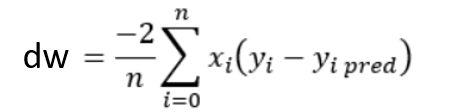

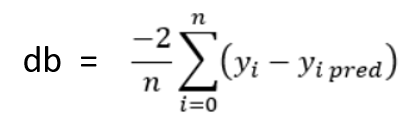

In [31]:
import numpy as np

In [32]:
# creating linear regression as an object
# class = user defined datatype , can have multiple dtype and functions

In [33]:
class Linear_Regression() :

  # initiating the parameters(learning rate and number of iterations)
  def __init__(self,learning_rate, no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):

    # number of training examples and number of features(assume only 1 for now)
    self.m,self.n=X.shape #number of rows and columns(datapoints and features respectively)

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculating gradients
    dw = -(2*(self.X.T).dot(self.Y - Y_prediction))/ self.m

    db = -2*np.sum(self.Y - Y_prediction)/self.m

    # updating the weights and biases
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w) + self.b




self : video se smnjho. model=Linear_Regression() likhne se model sare functions, jinme self as a parameter passed hai(in definition), me autometically pass ho jayega

In your/my code, how does the model know that it has reached global minimum? It will just run continuously till the iteration count. What if you set iteration count to 1000 and it found the best m and c values on 50th iteration, what then? also, where is the cost function calculated in the code?

To add a stopping criterion and a cost function, you can modify the code as follows:

Add a cost function to measure the error between the predicted values and the actual values. Typically, for linear regression, the mean squared error (MSE) is used as the cost function.

Check the cost function in each iteration, and stop the optimization if the cost doesn't decrease significantly or if it reaches a predefined threshold.

In [56]:
import numpy as np

class Linear_Regression():
    # giving tolerance as a default argument : 10^-4 se choti error ho jane pr stop
    def __init__(self, learning_rate, no_of_iterations, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.tolerance = tolerance

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            prev_cost = self.compute_cost()
            self.update_weights()
            current_cost = self.compute_cost()

            if abs(prev_cost - current_cost) < self.tolerance:
                break

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = -(2 * np.dot(self.X.T, (self.Y - Y_prediction))) / self.m
        db = -2 * np.sum(self.Y - Y_prediction) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def compute_cost(self):
        Y_prediction = self.predict(self.X)
        cost = np.mean((self.Y - Y_prediction) ** 2)
        return cost


# Using our linear Regression model for prediction

In [57]:
# importing the remaining required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Manually use as a library

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import manually_created_linear_regression as LR

In [80]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [81]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [82]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [83]:
salary_data.shape

(30, 2)

In [84]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [85]:
# splitting the features(years of experience) and target(salary)

In [86]:
X = salary_data.iloc[:,:-1].values  # removing the last column
Y = salary_data.iloc[:,1].values # taking index 1 column

In [87]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [88]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [89]:
# splitting the dataset into training and the test data

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

In [69]:
# training the linear regression model
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

using as module

In [93]:
# training the linear regression model
model = LR.Linear_Regression(learning_rate=0.02, no_of_iterations=5000)

In [94]:
# model learning :
model.fit(x_train, y_train)

In [95]:
# printing the parameter values
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9512.970381813464
bias =  23707.631743411293


trained linear regression model equation


salary = 9514(exprerience) + 23697

In [96]:
print(model.w) # numpy array of one element

[9512.97038181]


In [97]:
test_data_prediction = model.predict(x_test)

In [98]:
print(test_data_prediction)

[ 36074.49323977  34171.89916341  66515.99846157  58905.62215612
  91249.72145429  80785.45403429 101713.98887428  52246.54288885
  42733.57250704  88395.83033974]


In [99]:
# visualizing the predicted values and the actual values

Text(0, 0.5, 'Salary')

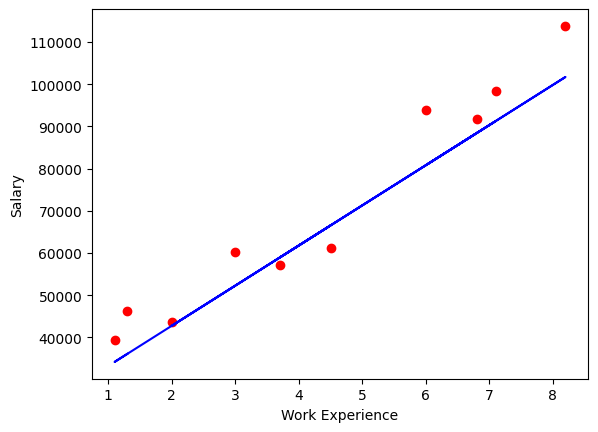

In [100]:

plt.scatter(x_test,y_test,color='red')
plt.plot(x_test, test_data_prediction,color='blue')
# plt.legend()
plt.xlabel("Work Experience")
plt.ylabel("Salary")

In [101]:
# Remember we are using gradient descent, So we don't need to take care of early stoppage techniques

 we use gradient Descent. beyond the global minimum, your parameters won't change much. you can also use a technique called as early stopping which will stop the training process if there's not a considerable change in the loss function, no matter what is the number of iterations we give.

Gradient Descent is indeed used to iteratively minimize the cost function, and as it approaches the global minimum, the changes in the parameters become very small. Early stopping is a valuable technique to prevent overfitting and speed up training. It's a great idea to cover these topics in a discussion about model optimization.

Early stopping is particularly useful when dealing with complex models or models with many parameters, as it allows you to halt training when further iterations are unlikely to significantly improve the model's performance on a validation set. This can save time and resources while preventing overfitting.